In [166]:
import numpy as np
import pandas as pd
#import pandas_profiling as pp
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

In [167]:
df_train = pd.read_csv("C:\\Users\\266251\\Downloads\\application_train.csv")


In [168]:
df_test =  pd.read_csv("C:\\Users\\266251\\Downloads\\application_test.csv")

In [7]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,257512.000000,257512.000000,257512.000000,2.575120e+05,2.575120e+05,257501.000000,2.572720e+05,257512.000000,257512.000000,257512.000000,...,257512.000000,257512.000000,257512.000000,257512.000000,222727.000000,222727.000000,222727.000000,222727.000000,222727.000000,222727.000000
mean,307143.115397,0.080769,0.416509,1.684155e+05,5.988950e+05,27108.806240,5.382673e+05,0.020882,-16039.898366,63930.692845,...,0.008058,0.000575,0.000505,0.000326,0.006268,0.006901,0.034747,0.266833,0.266348,1.903653
std,86047.050997,0.272481,0.721749,1.105872e+05,4.025061e+05,14480.289657,3.693680e+05,0.013845,4364.493540,141368.981432,...,0.089403,0.023967,0.022463,0.018058,0.083078,0.111287,0.206680,0.913544,0.825488,1.870100
min,157876.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,232638.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16542.000000,2.385000e+05,0.010006,-19689.000000,-2756.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,307140.500000,0.000000,0.000000,1.476000e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15753.000000,-1212.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,381476.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12420.000000,-288.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.800009e+07,4.050000e+06,230161.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,22.000000


In [8]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,157876,0,Cash loans,F,N,Y,0,67500.0,343800.0,16155.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,157878,0,Cash loans,M,Y,N,2,247500.0,945000.0,40167.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,157879,0,Revolving loans,M,N,Y,2,180000.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,157880,0,Cash loans,F,N,Y,0,112500.0,295168.5,16011.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,157881,0,Cash loans,F,N,Y,0,63000.0,298512.0,17266.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257512 entries, 0 to 257511
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(42), object(16)
memory usage: 239.7+ MB


In [177]:
df_train.shape

(257512, 122)

In [178]:
df_test.shape

(49999, 121)

In [179]:
df_test['TARGET']=np.NAN

In [161]:
df = pd.concat([df_train,df_test])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 49998
Columns: 122 entries, AMT_ANNUITY to YEARS_BUILD_MODE
dtypes: float64(66), int64(40), object(16)
memory usage: 288.6+ MB


In [109]:
df.isnull().sum()

AMT_ANNUITY                         12
AMT_CREDIT                           0
AMT_GOODS_PRICE                    278
AMT_INCOME_TOTAL                     0
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
APARTMENTS_AVG                  156061
APARTMENTS_MEDI                 156061
APARTMENTS_MODE                 156061
BASEMENTAREA_AVG                179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_MODE               179943
CNT_CHILDREN                         0
CNT_FAM_MEMBERS                      2
CODE_GENDER                          0
COMMONAREA_AVG                  214865
COMMONAREA_MEDI                 214865
COMMONAREA_MODE                 214865
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_ID_PUBLISH                      0
DAYS_LAST_PHONE_CHANGE   

In [285]:
df1.AMT_REQ_CREDIT_BUREAU_DAY  .isnull().sum()

41519

In [286]:
df1.AMT_REQ_CREDIT_BUREAU_DAY  .unique()

array([ 0., nan,  1.,  2.,  5.,  4.,  3.,  9.,  8.,  6.])

In [287]:
df1.AMT_REQ_CREDIT_BUREAU_DAY  .value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [255]:
catagorical_columns.isnull().sum()

CODE_GENDER                        0
EMERGENCYSTATE_MODE                0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
FONDKAPREMONT_MODE                 0
HOUSETYPE_MODE                     0
NAME_CONTRACT_TYPE                 0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
NAME_INCOME_TYPE                   0
NAME_TYPE_SUITE                    0
OCCUPATION_TYPE                    0
ORGANIZATION_TYPE                  0
WALLSMATERIAL_MODE            156341
WEEKDAY_APPR_PROCESS_START         0
dtype: int64

In [169]:
df1=df

In [172]:
# Replacing the 'XNA' value with NAN
df1['CODE_GENDER']=df1.CODE_GENDER.replace('XNA',np.nan)

In [175]:
#Replacing the nan value with fillna of MODE operation
df1['CODE_GENDER']=df1.groupby(['NAME_EDUCATION_TYPE'])['CODE_GENDER'].transform(lambda x: x.fillna(x.mode()[0]))


In [190]:
df1.EMERGENCYSTATE_MODE=df1.groupby(['NAME_EDUCATION_TYPE'])['EMERGENCYSTATE_MODE'].transform(lambda x: x.fillna(x.mode()[0]))

In [203]:
df1.FONDKAPREMONT_MODE=df1.groupby(['NAME_EDUCATION_TYPE'])['FONDKAPREMONT_MODE'].transform(lambda x: x.fillna(x.mode()[0]))

In [213]:
df1.HOUSETYPE_MODE=df1.groupby(['NAME_EDUCATION_TYPE'])['HOUSETYPE_MODE'].transform(lambda x: x.fillna(x.mode()[0]))

In [223]:
df1['NAME_FAMILY_STATUS']=df1.NAME_FAMILY_STATUS.replace('Unknown',np.nan)

In [227]:
df1.NAME_FAMILY_STATUS=df1.groupby(['NAME_EDUCATION_TYPE'])['NAME_FAMILY_STATUS'].transform(lambda x: x.fillna(x.mode()[0]))

In [237]:
df1.NAME_TYPE_SUITE=df1.groupby(['NAME_FAMILY_STATUS'])['NAME_TYPE_SUITE'].transform(lambda x: x.fillna(x.mode()[0]))

In [244]:
df1.OCCUPATION_TYPE=df1.groupby(['NAME_EDUCATION_TYPE'])['OCCUPATION_TYPE'].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
#need to update based on other numeric feature based.
df1.WALLSMATERIAL_MODE=df1.groupby(['NAME_EDUCATION_TYPE'])['WALLSMATERIAL_MODE'].transform(lambda x: x.fillna(x.mode()[0]))

#Numerical Column analysis 

In [278]:
numerical_columns.isnull().sum()

AMT_ANNUITY                          0
AMT_CREDIT                           0
AMT_GOODS_PRICE                    278
AMT_INCOME_TOTAL                     0
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
APARTMENTS_AVG                  156061
APARTMENTS_MEDI                 156061
APARTMENTS_MODE                 156061
BASEMENTAREA_AVG                179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_MODE               179943
CNT_CHILDREN                         0
CNT_FAM_MEMBERS                      2
COMMONAREA_AVG                  214865
COMMONAREA_MEDI                 214865
COMMONAREA_MODE                 214865
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_ID_PUBLISH                      0
DAYS_LAST_PHONE_CHANGE               1
DAYS_REGISTRATION        

KeyboardInterrupt: 

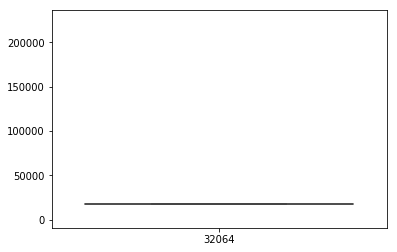

In [270]:
#Outlier finding
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df1.AMT_ANNUITY)

In [275]:
import numpy as np
import matplotlib.pyplot as plt
seed=0
#seed(1)
anomalies = []

# multiply and add by random numbers to get some real values
data = df1.AMT_ANNUITY

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = std(random_data)
    random_data_mean = mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(data)

NameError: name 'std' is not defined

In [272]:
anomalies

NameError: name 'anomalies' is not defined

In [281]:
df1.AMT_GOODS_PRICE .mean()

538396.2074288895

In [282]:
df1.AMT_GOODS_PRICE .min()

40500.0

In [283]:
df1.AMT_GOODS_PRICE .max()

4050000.0

In [265]:
df1.AMT_ANNUITY=df1.groupby(['AMT_INCOME_TOTAL'])['AMT_ANNUITY'].transform(lambda x: x.fillna(x.mean()))

In [284]:
df1.AMT_GOODS_PRICE=df1.groupby(['AMT_INCOME_TOTAL'])['AMT_GOODS_PRICE'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
def feature_scaling(df1):
    df1 -= df1.min()
    df1 /= df1.max()
    return df1

In [254]:
catagorical_columns=df1.select_dtypes(include='object')

In [277]:
numerical_columns=df1.select_dtypes(exclude='object')

In [183]:
catagorical_columns.head()

,CODE_GENDER,EMERGENCYSTATE_MODE,FLAG_OWN_CAR,FLAG_OWN_REALTY,FONDKAPREMONT_MODE,HOUSETYPE_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,OCCUPATION_TYPE,ORGANIZATION_TYPE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START
0,F,NaN,N,Y,NaN,NaN,Cash loans,Secondary / secondary special,Married,House / apartment,State servant,Unaccompanied,Medicine staff,Medicine,NaN,TUESDAY
1,M,NaN,Y,N,NaN,NaN,Cash loans,Secondary / secondary special,Married,House / apartment,Pensioner,Unaccompanied,NaN,XNA,NaN,WEDNESDAY
2,M,No,N,Y,NaN,NaN,Revolving loans,Secondary / secondary special,Married,House / apartment,Working,Unaccompanied,Sales staff,Business Entity Type 3,"Stone, brick",SATURDAY
3,F,No,N,Y,org spec account,block of flats,Cash loans,Higher education,Married,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 2,Mixed,SUNDAY
4,F,NaN,N,Y,NaN,NaN,Cash loans,Secondary / secondary special,Civil marriage,Municipal apartment,Pensioner,Unaccompanied,NaN,XNA,NaN,THURSDAY


In [186]:
catagorical_columns.columns

"""'CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE',
       'WEEKDAY_APPR_PROCESS_START'"""

Index(['CODE_GENDER', 'EMERGENCYSTATE_MODE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'WALLSMATERIAL_MODE',
       'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

In [ ]:
encode=pd.get_dummies(catagorical_columns.drop(columns=["Item_Identifier","source"]))

In [ ]:
df1=pd.concat([df1,pd.get_dummies(df1.NAME_CONTRACT_TYPE,df1.)],axis=1)

In [35]:
#from sklearn.feature_selection import info_gain
from sklearn.feature_selection import selectkbest,chi2
from sklearn.ensamble import IsolationForest

ImportError: cannot import name 'selectkbest'

In [38]:
from sklearn.feature_selection import SelectKBest, chi2